## Human detection

Using SVM prediction base on the featured extract by HOG

In [140]:
from skimage.feature import hog
from skimage.transform import pyramid_gaussian
from skimage.io import imread
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from skimage import color
from imutils.object_detection import non_max_suppression
import imutils
import numpy as np
import cv2 
import argparse
import cv2
import os
import glob
from PIL import Image # This will be used to read/modify images (can be done via OpenCV too)
from numpy import *

## Define path to image

In [141]:
base_path_train = "../data/human-and-non-human/training_set/training_set"
base_path_test = "../data/human-and-non-human/test_set/test_set"

pos_im_path = os.path.join(base_path_train, "humans")
#Define negative image for SVM training
neg_im_path = os.path.join(base_path_train, "non-humans")

# Similar to test data
pos_im_path_test = os.path.join(base_path_test, "humans")
neg_im_path_test = os.path.join(base_path_test, "non-humans")

if not os.path.exists(pos_im_path):
    print(f"Error: Path does not exist - {os.path.abspath(pos_im_path)}")
if not os.path.exists(neg_im_path):
    print(f"Error: Path does not exist - {os.path.abspath(neg_im_path)}")
if not os.path.exists(pos_im_path_test):
    print(f"Error: Path does not exist - {os.path.abspath(pos_im_path_test)}")
if not os.path.exists(neg_im_path_test):
    print(f"Error: Path does not exist - {os.path.abspath(neg_im_path_test)}")

pos_im_listing = os.listdir(pos_im_path)

neg_im_listing = os.listdir(neg_im_path)

pos_im_listing_test = os.listdir(pos_im_path_test)
neg_im_listing_test = os.listdir(neg_im_path_test)

num_pos_samples = size(pos_im_listing) # simply states the total no. of images
num_neg_samples = size(neg_im_listing)
num_pos_test = size(pos_im_listing_test)
num_neg_test = size(neg_im_listing_test)
print(num_pos_samples) # prints the number value of the no.of samples in positive dataset
print(num_neg_samples)
print(num_pos_test)
print(num_neg_test)
data = []
labels = []

484
4368
245
1309


## Compute the HOG features and label them

In [ ]:
# Putting label into positive image

winSize = (64, 128)
blockSize = (16, 16)
blockStride = (8, 8)
cellSize = (8, 8)
nbins = 9

hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)
for file in pos_im_listing:
    img_path = os.path.join(pos_im_path, file)
    
    try:
        img = Image.open(img_path).convert("RGB") # Open the file
        # Convert into NumPy array
        img = np.array(img)

        # Convert RGB to BGR (for OpenCV compatibility) 
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

        # Resize to standard HOG size (64x128) to ensure consistency
        img = cv2.resize(img, (64, 128))

        #Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Create a base features (if don't add any parameter, opencv will understand to take a base parameter)

        fd = hog.compute(gray).flatten() # Must change into 1D array (because fd return a multi-dimensional vector)
        # if fd.shape[0] != 3780:  # Expected size for 64x128 image
        #     print(f"Skipping {file} due to incorrect HOG feature shape: {fd.shape}")
        #     continue  # Skip this sample
        data.append(fd)
        labels.append(1)
        
        print(f"Processed training data (positive): {file}")
    except Exception as e:
        print(f"Skipping {file} (Error: {e})")

# Putting label into negative image
for file in neg_im_listing:
    img_path = os.path.join(neg_im_path, file)
    try:
        img = Image.open(img_path).convert("RGB") # Open the file
        # Convert into NumPy array
        img = np.array(img)

        # Convert RGB to BGR (for OpenCV compatibility) 
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

        # Resize to standard HOG size (64x128) to ensure consistency
        img = cv2.resize(img, (64, 128))

        #Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Create a base features (if don't add any parameter, opencv will understand to take a base parameter)

        fd = hog.compute(gray).flatten()
        # if fd.shape[0] != 3780:  # Expected size for 64x128 image
        #     print(f"Skipping {file} due to incorrect HOG feature shape: {fd.shape}")
        #     continue  # Skip this sample
        data.append(fd)
        labels.append(0)
        print(f"Processed training data (negative): {file}")
    except Exception as e:
        print(f"Skipping {file} (Error: {e})")

## Testing label

data_test = []
label_test = []

for file in pos_im_listing_test:
    img_path = os.path.join(pos_im_path_test, file)
    
    try:
        img = Image.open(img_path).convert("RGB") # Open the file
        # Convert into NumPy array
        img = np.array(img)

        # Convert RGB to BGR (for OpenCV compatibility) 
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

        # Resize to standard HOG size (64x128) to ensure consistency
        img = cv2.resize(img, (64, 128))

        #Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Create a base features (if don't add any parameter, opencv will understand to take a base parameter)

        fd = hog.compute(gray).flatten() # Must change into 1D array (because fd return a multi-dimensional vector)
        # if fd.shape[0] != 3780:  # Expected size for 64x128 image
        #     print(f"Skipping {file} due to incorrect HOG feature shape: {fd.shape}")
        #     continue  # Skip this sample
        data_test.append(fd)
        label_test.append(1)
        
        print(f"Processed test data (positive): {file}")
    except Exception as e:
        print(f"Skipping {file} (Error: {e})")

# Putting label into negative image
for file in neg_im_listing_test:
    img_path = os.path.join(neg_im_path_test, file)
    try:
        img = Image.open(img_path).convert("RGB") # Open the file
        # Convert into NumPy array
        img = np.array(img)

        # Convert RGB to BGR (for OpenCV compatibility) 
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

        # Resize to standard HOG size (64x128) to ensure consistency
        img = cv2.resize(img, (64, 128))

        #Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Create a base features (if don't add any parameter, opencv will understand to take a base parameter)

        fd = hog.compute(gray).flatten()
        # if fd.shape[0] != 3780:  # Expected size for 64x128 image
        #     print(f"Skipping {file} due to incorrect HOG feature shape: {fd.shape}")
        #     continue  # Skip this sample
        data_test.append(fd)
        label_test.append(0)
        print(f"Processed test data (negative): {file}")
    except Exception as e:
        print(f"Skipping {file} (Error: {e})")


Processed training data (positive): 221.png
Processed training data (positive): 222.png
Processed training data (positive): 223.png
Processed training data (positive): 224.png
Processed training data (positive): 225.png
Processed training data (positive): 226.png
Processed training data (positive): 227.png
Processed training data (positive): 228.png
Processed training data (positive): 229.png
Processed training data (positive): 230.png
Processed training data (positive): 231.png
Processed training data (positive): 232.png
Processed training data (positive): 233.png
Processed training data (positive): 234.png
Processed training data (positive): 235.png
Processed training data (positive): 236.png
Processed training data (positive): 237.png
Processed training data (positive): 238.png
Processed training data (positive): 239.png
Processed training data (positive): 240.png
Processed training data (positive): 241.png
Processed training data (positive): 242.png
Processed training data (positiv

In [143]:
# Partitioning the data into training and testing splits, using 80%
# of the data for training and the remaining 20% for testing
print(" Constructing training/testing split...")
data = np.array(data, dtype=np.float32)
labels = np.array(labels, dtype=np.int32)
data_test = np.array(data_test, dtype=np.float32)
label_test = np.array(label_test, dtype=np.int32)

print(data_test.shape)
print(label_test.shape)

(trainData, testData, trainLabels, testLabels) = (data, data_test, labels, label_test)

# Train the linear SVM
print(" Training Linear SVM classifier...")
model = LinearSVC()
model.fit(trainData, trainLabels)
# Evaluate the classifier
print(" Evaluating classifier on test data ...")
pred = model.predict(testData)
# Calculate accuracy
accuracy = accuracy_score(testLabels, pred)
print(f"Accuracy: {accuracy}")

print("Report\n",classification_report(testLabels, pred))

# Save the model
joblib.dump(model, 'SVM_HOG.pkl')
print("SVM Model save Successfully!")


 Constructing training/testing split...
(1554, 3780)
(1554,)
 Training Linear SVM classifier...
 Evaluating classifier on test data ...
Accuracy: 0.8326898326898327
Report
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      1309
           1       0.47      0.42      0.44       245

    accuracy                           0.83      1554
   macro avg       0.68      0.67      0.67      1554
weighted avg       0.83      0.83      0.83      1554

SVM Model save Successfully!


## Load the Trained SVM Model

In [144]:
svm_model = joblib.load("SVM_HOG.pkl")
print("SVM Model load Successfully!")

SVM Model load Successfully!


## Sliding Window function

In [145]:
def sliding_window(image, stepSize, windowSize):
    for y in range(0, image.shape[0] - windowSize[1], stepSize):
        for x in range(0, image.shape[1] - windowSize[0], stepSize):
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

## Detect people

0.png
[0]
[0]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[1]
[0]
[1]
[1]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[0]
[0]
[1]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1

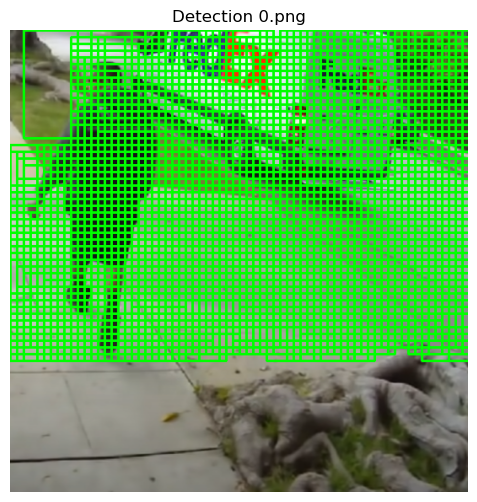

In [151]:
import matplotlib.pyplot as plt

winSize = (64, 128)
blockSize = (16, 16)
blockStride = (8, 8)
cellSize = (8, 8)
nbins = 9
hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)

# Load img (testing 6 images)
for file in pos_im_listing_test[:1]:
    print(file)
    img_path = os.path.join(pos_im_path_test, file)

    try:

        img = Image.open(img_path).convert("RGB") # Open the file
        # Convert into NumPy array
        img = np.array(img)
        
        # Convert RGB to BGR (for OpenCV compatibility) 
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

        #Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray, (600, 400)) 

        # print(img.shape)

        # fd = hog.compute(gray).flatten() # Must change into 1D array (because fd return a multi-dimensional vector)
        
        detections = []
        window_size = (64,128)
        step_size = 8

        for (x , y , window) in sliding_window(gray, step_size, window_size):
            if (window.shape[1] != window_size[0] or window.shape[0] != window_size[1]):
                continue
            #Extract HOG features
            hog_features = hog.compute(window).flatten()

            #prediction SVM
            pred = svm_model.predict([hog_features])
            print(pred)
            if pred == 1: 
                detections.append((x,y, window_size[0], window_size[1]))
        print(f" {len(detections)} People Detected!")

        # Apply Non-Maximum Suppression (NMS) to remove overlapping boxes
        if len(detections) > 0:
            detections = np.array(detections)
            final_detections = non_max_suppression(detections, probs=None, overlapThresh=0.65)
        else:
            final_detections = []

        #Draw
        for (x, y, w, h) in final_detections:
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        #Convert BGR to RGB for display in matplotlib
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        #Display using matplotlib
        plt.figure(figsize = (10,6))
        plt.imshow(img_rgb)
        plt.title(f"Detection {file}")
        plt.axis("off")
        plt.show()
        

    except Exception as e:
        print(f"Skipping {file} (Error: {e})")
    